# Loop Condition

## Imports

In [2]:
import sys
sys.path.append("../../src")
%reload_ext autoreload
%autoreload 2
from helpers import graph
from path_invariants import *
from math import sqrt

The successor graph for $L=pqrpqrpqrpqr=4(pqr)$ is the following:

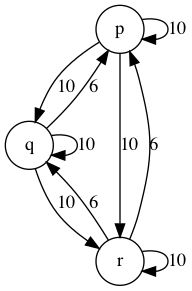

In [5]:
L="pqr"*4
successor_G_L = successor_graph(L) 
graph(successor_G_L, filename="figures/successor_graph_loop.png")

The directed graph $G=(V, E, W)$ verifies the **loop condition** if the following conditions are true:

1. G has a f-cut ($C^U$ upper cut) that verifies the path condition, let $w^+=f$ the weight of such cut.
1. The upper cut covers all G: $ |V(C^U)|  = |V(G)| $
1. $\exists w^- \in \mathbb{N} : \forall (u,v) \in $C^U$ \land u \neq v \implies W(v,u)=w^-$
1. $r=\sqrt{ w^+ + w^- } \in \mathbb{N} $
1. $w^+ > w^-$  (But I conjecture that this condition is implied by having (1), then $\forall u : W(u,u)=w^+$, that introduces an assimetry.)

Condition (1) implies that G has only one component. Condition (2) is needed to avoid false discovery in subgraphs. Condition (3) ensures the symetry in the inversed path Condition (4) verifies the correct combinatory between $(u, v)$ , $(v, u)$ pairs.

The graph $G^S_L$ has weights $w^+=10$ , $w^-=6$, and $r = \sqrt{10 + 6} = 4 $, then it verifies the loop condition.

In [15]:
loop_condition(successor_G_L)

(True, 6, 10)

The $f$-layers of $L$ for $f=10$ and $f=6$ are:

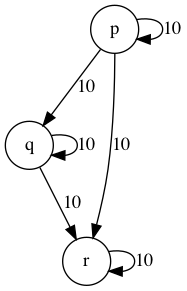

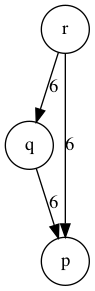

In [16]:
graph( f_layer( 10, successor_G_L ), "figures/upper-layer.png" )
graph( f_layer( 6,  successor_G_L ), "figures/lower-layer.png" )

The upper-layer of $L$ verifies the path condition and the loop conditions:

In [9]:
path_condition( f_layer( 10, successor_G_L ) )

True

But the lower-layer don't

In [17]:
path_condition( f_layer( 6, successor_G_L ) )

False

Examples of traces that are not single loops

In [11]:
a_given_graph = successor_graph("abxyxycd")
loop_condition(a_given_graph)

(False, 0, 0)

In [12]:
a_given_graph = successor_graph("aabcdabcd")
loop_condition(a_given_graph)

(False, 0, 0)

In [18]:
a_given_graph = successor_graph("abcabcxyzxyz")
loop_condition(a_given_graph)

(False, 0, 0)